Author: Noelle Zeng
Title: First Kaggle Challenge, simple Implementation

In [3]:
from csv import *
import pandas as pd
import numpy as np
import os

In [4]:
#set current working directory to opened folder
os.getcwd()

'C:\\Users\\noell\\KG_Titanicproject'

In [5]:
#read data files
tdf=pd.read_csv("test.csv")
df= pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#check info for missing values 
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We notice that there are missing values for Age, cabin and Embarked.


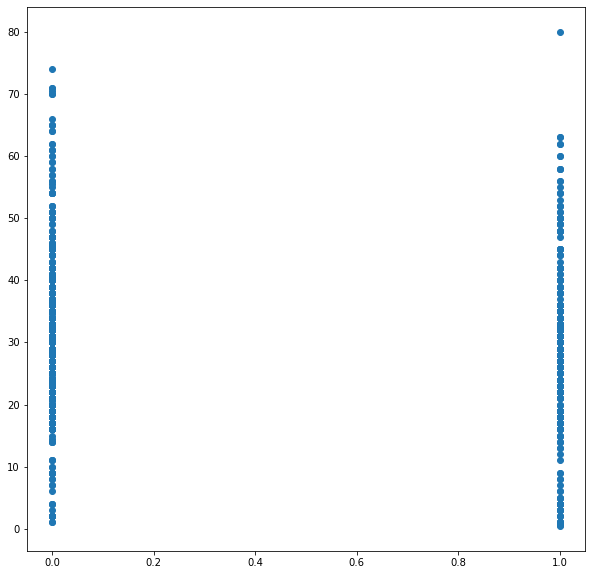

In [11]:
#plotting survived per age
x= df.Survived
y= df.Age

import matplotlib.pyplot as plt

plt.figure(figsize =(10,10))
plt.scatter(x,y)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

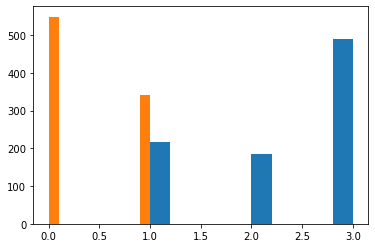

In [13]:
#we notice that only one person after 67 survived

c=df.Pclass
plt.hist(c)

plt.hist(x)


In [14]:
#about 2/5 people survived
#many people in 3rd class

In [15]:
miss_age=df[df.Age.isnull() == True]
miss_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


(array([ 30.,   0.,   0.,   0.,   0.,  11.,   0.,   0.,   0., 136.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

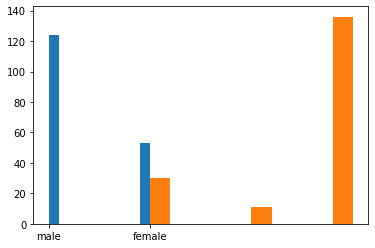

In [18]:
#plt.hist(miss_age.Survived)
plt.hist(miss_age.Sex)
plt.hist(miss_age.Pclass)

In [26]:
#to simplify I drop variables that I belive not very relevant for the predicition
#df=df.drop(['Cabin','Name','Ticket'],axis=1)
df.head()

#drop them also in my test set
#tdf= tdf.drop(['Cabin','Name','Ticket'],axis=1)

#Then use L.E
#clean sex category usig label encoder as it's binary data
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder(handle_unknown='ignore')

le.fit(df.Sex)
le.fit(tdf.Sex)
le.classes_
#encoding Sex column and Embarked column

df.Sex=le.transform(df.Sex)
tdf.Sex=le.transform(tdf.Sex)
df.head()



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [46]:
#use one hot encoder (OHE) for data with more than 2 categories
#df.Embarked=df.Embarked.astype(str)
#df.Embarked.to_numpy()
#df.Embarked.array.reshape(1,-1)
#df["Embarked"]=df.Embarked.astype(str)
#ohe.fit(df["Embarked"])
#df["Embarked"]=ohe.transform(df["Embarked"])

#tdf.Embarked=tdf.Embarked.astype(str)
#ohe.fit(tdf.Embarked)
#tdf.Embarked=ohe.transform(tdf.Embarked)

df=df.drop(["Embarked"],axis=1)
#fill in age Nan with age mean
mean_age=np.mean(df.Age)
print(mean_age)
df.Age=df.Age.fillna(mean_age)
print(df.head(10))
df.info()



#Now all the columns are in numerical data so we ca input a model for test
tdf.info()

29.699117647058763
   PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch     Fare
0            1         0       3    1  22.000000      1      0   7.2500
1            2         1       1    0  38.000000      1      0  71.2833
2            3         1       3    0  26.000000      0      0   7.9250
3            4         1       1    0  35.000000      1      0  53.1000
4            5         0       3    1  35.000000      0      0   8.0500
5            6         0       3    1  29.699118      0      0   8.4583
6            7         0       1    1  54.000000      0      0  51.8625
7            8         0       3    1   2.000000      3      1  21.0750
8            9         1       3    0  27.000000      0      2  11.1333
9           10         1       2    0  14.000000      1      0  30.0708
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 

In [47]:
#missing data using mean imputation
miss_Fare=tdf[tdf.Fare.isna()==True]
miss_Fare.head()
mean_fare=np.mean(tdf.Fare)
tdf.iloc[152,6]= mean_fare

mean_age=np.mean(tdf.Age)
tdf.Age=tdf.Age.fillna(mean_age)

tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 26.2+ KB


In [48]:
#setting X, y values here y is the survived colums
from sklearn.model_selection import train_test_split
X= df.drop("Survived", axis=1)
y=df.Survived


X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 20)


In [49]:
#pick one classifier and fit it to our model
#the one with highest accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


clfs= [LogisticRegression(random_state=1,max_iter=1000), KNeighborsClassifier(5), SVC(probability=True), RandomForestClassifier()]
for clf in clfs:
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    print(clf,"has accuracy:",acc)


    


LogisticRegression(max_iter=1000, random_state=1) has accuracy: 0.8268156424581006
KNeighborsClassifier() has accuracy: 0.6089385474860335
SVC(probability=True) has accuracy: 0.6871508379888268
RandomForestClassifier() has accuracy: 0.8156424581005587


In [56]:
tdf=tdf.drop(["Embarked"],axis=1)

In [57]:
#use Logistic for my predictions
predictions=LogisticRegression(max_iter=1000,random_state=0).fit(X_train,y_train).predict(tdf)

#upload index file as pd DataFrame
sub=pd.read_csv('gender_submission.csv')
#add column with my predictions
sub.Survived=predictions

#save my final dataframe ad csv file, to be submitted
sub.to_csv("submission.csv", index = False)